<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-(data-shape,-balance,-etc)" data-toc-modified-id="Descriptive-statistics-(data-shape,-balance,-etc)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Descriptive statistics (data shape, balance, etc)</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li></ul></li><li><span><a href="#ML-template-starts---training-session" data-toc-modified-id="ML-template-starts---training-session-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ML template starts - training session</a></span><ul class="toc-item"><li><span><a href="#Training-model-(LGBM)-with-stratisfied-CV" data-toc-modified-id="Training-model-(LGBM)-with-stratisfied-CV-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Training model (LGBM) with stratisfied CV</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Importance plot</a></span></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span></li><li><span><a href="#Anomaly-detection-on-the-training-set-(on-top-features-alone)" data-toc-modified-id="Anomaly-detection-on-the-training-set-(on-top-features-alone)-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Anomaly detection on the training set (on top features alone)</a></span></li><li><span><a href="#Data-leakage-test" data-toc-modified-id="Data-leakage-test-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Data leakage test</a></span></li>
<li><span><a href="##-Analysis-of-FPs/FNs" data-toc-modified-id="##-Analysis-of-FPs/FNs"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Analysis of FPs/FNs</a></span></li></ul></li></ul></div>

In [40]:
import warnings
import pandas as pd 
import numpy as np
from pandas_summary import DataFrameSummary
import octopus_ml as oc 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re
import optuna 
from optuna.visualization import plot_optimization_history, plot_param_importances
plot_optimization_history(study)

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
%matplotlib inline
warnings.simplefilter("ignore")

NameError: name 'study' is not defined

### Read the Kaggle Titanic competition dataset 
https://www.kaggle.com/c/titanic

In [2]:
XY_df=pd.read_csv('../datasets/Kaggle_titanic_train.csv')

# EDA and pre-processing 

## Descriptive statistics (data shape, balance, etc)

In [3]:
XY_df.shape

(891, 12)

In [4]:
XY_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target distribution

In [5]:
XY_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

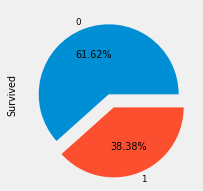

In [6]:
oc.target_pie(XY_df,'Survived')

### Selected features vs target historgrams 

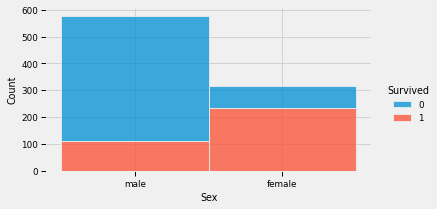

In [7]:
oc.hist_target(XY_df, 'Sex', 'Survived')

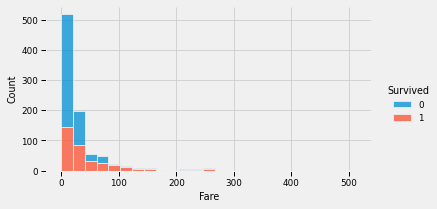

In [8]:
oc.hist_target(XY_df, 'Fare', 'Survived')

### Data summary - and missing values analysis

In [9]:
import missingno as msno
from pandas_summary import DataFrameSummary
dfs = DataFrameSummary(XY_df)
dfs.summary()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,NaN,NaN,714,891,891,NaN,891,NaN,NaN
mean,446,0.383838,2.30864,NaN,NaN,29.6991,0.523008,0.381594,NaN,32.2042,NaN,NaN
std,257.354,0.486592,0.836071,NaN,NaN,14.5265,1.10274,0.806057,NaN,49.6934,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,223.5,0,2,NaN,NaN,20.125,0,0,NaN,7.9104,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN
75%,668.5,1,3,NaN,NaN,38,1,0,NaN,31,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [10]:
# Top 5 sparse features, mainly labs results 
pd.Series(1 - XY_df.count() / len(XY_df)).sort_values(ascending=False).head(5)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Fare        0.000000
Ticket      0.000000
dtype: float64

## Data pre-processing 

In [11]:
XY_df['Cabin'] = XY_df['Cabin'].astype('str').fillna("U0")
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
XY_df['Deck'] = XY_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
XY_df['Deck'] = XY_df['Deck'].map(deck)
XY_df['Deck'] = XY_df['Deck'].fillna(0)
XY_df['Deck'] = XY_df['Deck'].astype('category')

XY_df['relatives'] = XY_df['SibSp'] + XY_df['Parch']
XY_df.loc[XY_df['relatives'] > 0, 'not_alone'] = 0
XY_df.loc[XY_df['relatives'] == 0, 'not_alone'] = 1
XY_df['not_alone'] = XY_df['not_alone'].astype(int)

def encodeAgeFare(train):
    train.loc[train['Age'] <= 16, 'Age_fare'] = 0
    train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_fare'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_fare'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_fare'] = 3
    train.loc[ (train['Age'] > 48) & (train['Age'] <= 80), 'Age_fare'] = 4
    
    train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_adj'] = 1
    train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'Fare_adj'] = 2
    train.loc[(train['Fare'] > 31.0) & (train['Fare'] <= 512.329), 'Fare_adj'] = 3

encodeAgeFare(XY_df)


In [12]:
# Categorical features pre-proccesing  
cat_list ,XY_df=oc.cat_features_proccessing(XY_df)
print (cat_list)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck']


In [13]:
features=XY_df.columns.to_list()
print ('number of features ', len(features))

features_remove=['PassengerId','Survived']
for f in features_remove:
    features.remove(f)

number of features  17


In [14]:
X=XY_df[features]
y=XY_df['Survived']

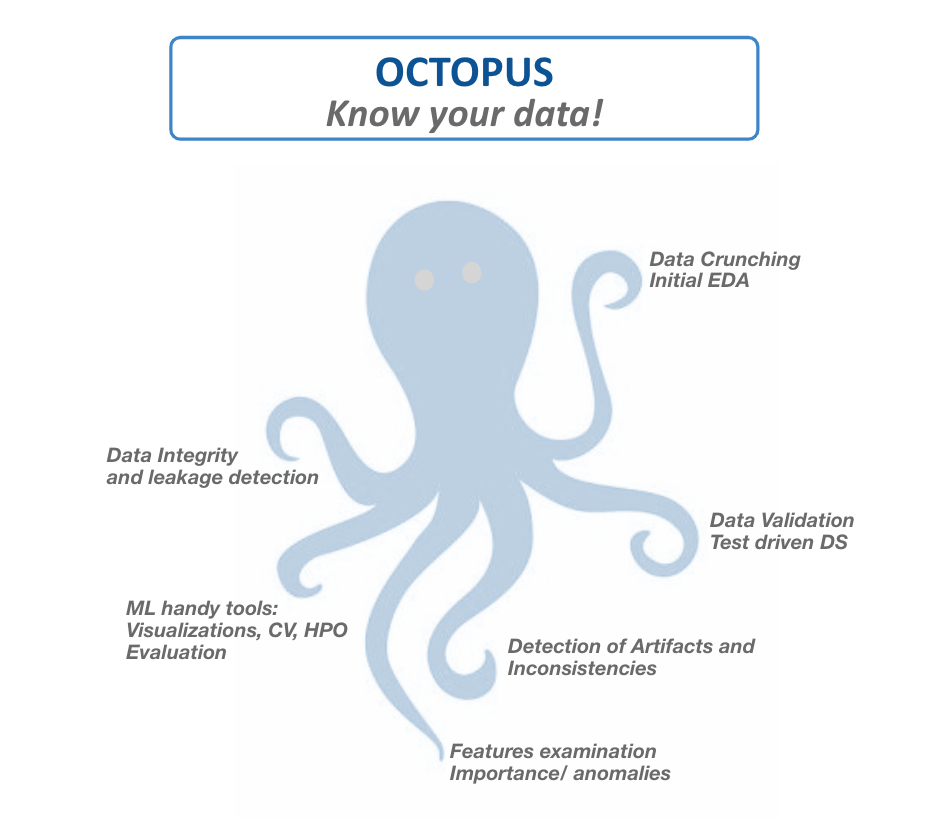

In [15]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

In [16]:
XY_sampled=oc.sampling(XY_df,'Survived',200)

number of positive instances: 342 
number of negative instance :  549
new dataset shape:  (542, 17)
Method Name       : sampling
Current memory usage: 0.078669MB
Peak                : 0.092296MB
Total time taken:   13.501 ms 


# ML template starts - training session 

## Training model (LGBM) with stratisfied CV 

In [17]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import pandas as pd
import numpy as np
import lightgbm as lgb
import tracemalloc


def cv_adv(X, y, threshold, iterations, shuffle=True, params=None, mode="classification"):

    # Cross Validation - stratified with and without shuffeling
    arr_f1_weighted = np.array([])
    arr_f1_macro = np.array([])
    arr_f1_positive = np.array([])
    arr_recall = np.array([])
    arr_precision = np.array([])
    prediction_folds = []
    preds_folds = []
    y_folds = []
    stacked_models =[]
    index_column=[]

    if mode=="regression":
        skf = KFold(n_splits=5)
    else:
        skf = StratifiedKFold(n_splits=5, random_state=2, shuffle=shuffle)

    for train_index, test_index in tqdm(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = lgbm(X_train, y_train, X_test, y_test, iterations, params)
        preds = clf.predict(X_test)

        predictions = []
        predictions = adjusted_classes(preds, threshold)
        stacked_models.append(clf)
        index_column.extend(X_test.index.values.tolist())
        #index_column=np.append(index_column,X_test.index.values.astype(int))
    
        """ Multiclass 
        predictions = clf.predict(X_test)
        predictions_classes = []
        for i in predictions:   
            print (np.argmax(i))
            predictions_classes.append(np.argmax(i))  
        """
                               
        if mode=="regression":
            prediction_folds.extend(predictions)
            preds_folds.extend(preds)
            y_folds.extend(y_test) 
            final_clf = lgbm(X, y, X_test, y_test, iterations, params)

        else:
            prediction_folds.extend(predictions)
            preds_folds.extend(preds)
            y_folds.extend(y_test)
            arr_f1_weighted = np.append(
                arr_f1_weighted, f1_score(y_test, predictions, average="weighted")
            )
            arr_f1_macro = np.append(
                arr_f1_macro, f1_score(y_test, predictions, average="macro")
            )
            arr_f1_positive = np.append(
                arr_f1_positive, f1_score(y_test, predictions, average="binary")
            )
            final_clf = lgbm(X, y, X_test, y_test, iterations, params)

    return (
        {'final_clf': final_clf,
        'f1_weighted':arr_f1_weighted,
        'f1_macro':arr_f1_macro,
        'f1_positive': arr_f1_positive,
        'predictions_folds':prediction_folds,
        'predictions_proba': preds_folds,
        'y':y_folds,
        'index':index_column,
        'stacked_models': stacked_models}
    )

def lgbm(X_train, y_train, X_test, y_test, num, params=None):
    # Training function for LGBM with basic categorical features treatment and close to default params

    categorical_features = []
    for c in X_train.columns:
        col_type = X_train[c].dtype
        if col_type == "object" or col_type.name == "category":
            # an option in case the data(pandas dataframe) isn't passed with the categorical column type
            # X[c] = X[c].astype('category')
            categorical_features.append(c)

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
    lgb_valid = lgb.Dataset(X_test, y_test, categorical_feature=categorical_features)

    if params == None:
        params = {
            "objective": "binary",
            "boosting": "gbdt",
            "scale_pos_weight": 0.02,
            "learning_rate": 0.005,
            "seed": 100
            # 'categorical_feature': 'auto',
            # 'metric': 'auc',
            # 'scale_pos_weight':0.1,
            # 'learning_rate': 0.02,
            # 'num_boost_round':2000,
            # "min_sum_hessian_in_leaf":1,
            # 'max_depth' : 100,
            # "bagging_freq": 2,
            # "num_leaves":31,
            # "bagging_fraction" : 0.4,
            # "feature_fraction" : 0.05,
        }

    clf = lgb.train(params, lgb_train, num)

    return clf


def adjusted_classes(y_scores, t):
    # transformation from prediction probabolity to class given the threshold
    return [1 if y >= t else 0 for y in y_scores]



In [42]:
def create(hyperparams):
    """Create LGBM Classifier for a given set of hyper-parameters."""
    model = LGBMClassifier(**hyperparams)
    return model

def kfold_evaluation(X, y, k, hyperparams, esr=100):
    scores = []
 
    kf = KFold(k)
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"\n-------- FOLD {i} --------")
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[test_idx]
        y_val = y.iloc[test_idx]
        
        model = create(hyperparams)
        model = fit_with_stop(model, X_train, y_train, X_val, y_val, esr)
        train_score = evaluate(model, X_train, y_train)
        val_score = evaluate(model, X_val, y_val)
        scores.append((train_score, val_score))
        
        #print(f"Fold {i} | Eval AUC: {val_score}")    
        
    scores = pd.DataFrame(scores, columns=['train score', 'validation score']) 
    return scores

# Constant
K = 3
# Objective function
def objective(trial):
    # Search spaces
    hyperparams = {
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200)
    }
    
    hyperparams.update(best_params)
    scores = kfold_evaluation(X, y, K, hyperparams, 100)
    return scores['validation score'].mean()

def create(hyperparams):
    model = LGBMClassifier(**hyperparams)
    return model

def fit(model, X, y):
    model.fit(X, y)
    return model

def fit_with_stop(model, X, y, X_val, y_val, esr):
    model.fit(X, y,
              eval_set=(X_val, y_val),
              early_stopping_rounds=esr, 
              verbose=200)
    return model

def evaluate(model, X, y):
    yp = model.predict_proba(X)[:, 1]
    auc_score = roc_auc_score(y, yp)
    return auc_score


## Hyper Parameter Optimization


In [43]:
best_params = {
    'n_estimators': 1000,
    'learning_rate': 0.05, 
    'metric': 'auc', 
    'verbose': -1

}
from lightgbm import LGBMClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

study = optuna.create_study(direction='maximize')
#study.optimize(objective, timeout=360*7)
study.optimize(objective, n_trials=10)


[I 2021-04-12 18:00:55,625] A new study created in memory with name: no-name-51c32856-2da7-459f-b3df-3e5fd6ba1684



-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.805863
[400]	valid_0's auc: 0.816112
[600]	valid_0's auc: 0.818977
[800]	valid_0's auc: 0.820063
Early stopping, best iteration is:
[838]	valid_0's auc: 0.820211

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.862796
Early stopping, best iteration is:
[256]	valid_0's auc: 0.863443

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds


[I 2021-04-12 18:00:56,328] Trial 0 finished with value: 0.8508852693636412 and parameters: {'reg_alpha': 7.083105901552592, 'reg_lambda': 3.671845169499529, 'num_leaves': 100, 'min_child_samples': 57, 'max_depth': 52, 'colsample_bytree': 0.2773992631290695, 'cat_smooth': 58, 'cat_l2': 9, 'min_data_per_group': 90}. Best is trial 0 with value: 0.8508852693636412.


Early stopping, best iteration is:
[30]	valid_0's auc: 0.869513

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.834881
Early stopping, best iteration is:
[237]	valid_0's auc: 0.837128

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.883575
Early stopping, best iteration is:
[148]	valid_0's auc: 0.884962

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.882618


[I 2021-04-12 18:00:57,374] Trial 1 finished with value: 0.8688240503575453 and parameters: {'reg_alpha': 0.3491424177084913, 'reg_lambda': 2.9385399799790353, 'num_leaves': 721, 'min_child_samples': 52, 'max_depth': 20, 'colsample_bytree': 0.4758898058150408, 'cat_smooth': 56, 'cat_l2': 7, 'min_data_per_group': 136}. Best is trial 1 with value: 0.8688240503575453.


Early stopping, best iteration is:
[152]	valid_0's auc: 0.884382

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.804356
[400]	valid_0's auc: 0.810975
[600]	valid_0's auc: 0.811617
[800]	valid_0's auc: 0.812605
Early stopping, best iteration is:
[789]	valid_0's auc: 0.812605

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.858936
Early stopping, best iteration is:
[111]	valid_0's auc: 0.859421

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds


[I 2021-04-12 18:00:58,091] Trial 2 finished with value: 0.846219016902683 and parameters: {'reg_alpha': 7.22629895893493, 'reg_lambda': 0.8794432283474658, 'num_leaves': 723, 'min_child_samples': 91, 'max_depth': 56, 'colsample_bytree': 0.2552625702063128, 'cat_smooth': 61, 'cat_l2': 7, 'min_data_per_group': 86}. Best is trial 1 with value: 0.8688240503575453.


Early stopping, best iteration is:
[55]	valid_0's auc: 0.86677

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.818853
[400]	valid_0's auc: 0.83093
[600]	valid_0's auc: 0.836264
Early stopping, best iteration is:
[568]	valid_0's auc: 0.836412

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.877196
[400]	valid_0's auc: 0.880617
Early stopping, best iteration is:
[356]	valid_0's auc: 0.881541

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.88982


[I 2021-04-12 18:00:59,148] Trial 3 finished with value: 0.8710283279890798 and parameters: {'reg_alpha': 2.567325409846061, 'reg_lambda': 8.020851867795816, 'num_leaves': 628, 'min_child_samples': 18, 'max_depth': 36, 'colsample_bytree': 0.19808892575600567, 'cat_smooth': 62, 'cat_l2': 16, 'min_data_per_group': 133}. Best is trial 3 with value: 0.8710283279890798.


[400]	valid_0's auc: 0.895503
Early stopping, best iteration is:
[429]	valid_0's auc: 0.896042

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.816754
[400]	valid_0's auc: 0.831448
Early stopping, best iteration is:
[403]	valid_0's auc: 0.831596

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.869152
[400]	valid_0's auc: 0.871857
[600]	valid_0's auc: 0.876387
[800]	valid_0's auc: 0.876734
Early stopping, best iteration is:
[706]	valid_0's auc: 0.877011

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.874388
[400]	valid_0's auc: 0.877058
[600]	valid_0's auc: 0.878552
[800]	valid_0's auc: 0.880413
[1000]	valid_0's auc: 0.88105
Did not meet early stopping. Best iteration is:
[961]	valid_0's auc: 0.881834


[I 2021-04-12 18:01:00,311] Trial 4 finished with value: 0.8634034501972083 and parameters: {'reg_alpha': 0.87374875887037, 'reg_lambda': 9.369754460807714, 'num_leaves': 883, 'min_child_samples': 85, 'max_depth': 59, 'colsample_bytree': 0.2563307054719969, 'cat_smooth': 99, 'cat_l2': 16, 'min_data_per_group': 109}. Best is trial 3 with value: 0.8710283279890798.



-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.813568
[400]	valid_0's auc: 0.822212
[600]	valid_0's auc: 0.823941
[800]	valid_0's auc: 0.824237
[1000]	valid_0's auc: 0.825768
Did not meet early stopping. Best iteration is:
[926]	valid_0's auc: 0.825966

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.876479
[400]	valid_0's auc: 0.879345
Early stopping, best iteration is:
[432]	valid_0's auc: 0.879854

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.88056
[400]	valid_0's auc: 0.881834
[600]	valid_0's auc: 0.883132


[I 2021-04-12 18:01:01,732] Trial 5 finished with value: 0.8629803694371706 and parameters: {'reg_alpha': 4.172517351182977, 'reg_lambda': 3.422853798711023, 'num_leaves': 469, 'min_child_samples': 45, 'max_depth': 13, 'colsample_bytree': 0.20887320847912516, 'cat_smooth': 20, 'cat_l2': 7, 'min_data_per_group': 196}. Best is trial 3 with value: 0.8710283279890798.


[800]	valid_0's auc: 0.883573
Early stopping, best iteration is:
[810]	valid_0's auc: 0.883622

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.825422
Early stopping, best iteration is:
[207]	valid_0's auc: 0.825521

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.869499
[400]	valid_0's auc: 0.871648
Early stopping, best iteration is:
[332]	valid_0's auc: 0.871672

-------- FOLD 2 --------


[I 2021-04-12 18:01:02,729] Trial 6 finished with value: 0.8558867456010176 and parameters: {'reg_alpha': 7.693871009647226, 'reg_lambda': 8.943772817828465, 'num_leaves': 981, 'min_child_samples': 51, 'max_depth': 40, 'colsample_bytree': 0.4677215485116376, 'cat_smooth': 43, 'cat_l2': 8, 'min_data_per_group': 87}. Best is trial 3 with value: 0.8710283279890798.


Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.869929
[400]	valid_0's auc: 0.870517
Early stopping, best iteration is:
[419]	valid_0's auc: 0.870566

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.833449
Early stopping, best iteration is:
[218]	valid_0's auc: 0.834585

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[14]	valid_0's auc: 0.882812

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds


[I 2021-04-12 18:01:03,551] Trial 7 finished with value: 0.8711952086214763 and parameters: {'reg_alpha': 2.028341641327015, 'reg_lambda': 9.058848843938758, 'num_leaves': 725, 'min_child_samples': 33, 'max_depth': 13, 'colsample_bytree': 0.48606542396164654, 'cat_smooth': 51, 'cat_l2': 8, 'min_data_per_group': 199}. Best is trial 7 with value: 0.8711952086214763.


[200]	valid_0's auc: 0.894915
Early stopping, best iteration is:
[244]	valid_0's auc: 0.896189

-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.796503
[400]	valid_0's auc: 0.806159
[600]	valid_0's auc: 0.810654
[800]	valid_0's auc: 0.811617
Early stopping, best iteration is:
[788]	valid_0's auc: 0.811667

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.858843
[400]	valid_0's auc: 0.862241
[600]	valid_0's auc: 0.863813
[800]	valid_0's auc: 0.865431
Early stopping, best iteration is:
[779]	valid_0's auc: 0.865523

-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.864198


[I 2021-04-12 18:01:04,525] Trial 8 finished with value: 0.8470303256234447 and parameters: {'reg_alpha': 4.830195886698662, 'reg_lambda': 4.325110586174375, 'num_leaves': 791, 'min_child_samples': 96, 'max_depth': 57, 'colsample_bytree': 0.14964647462877562, 'cat_smooth': 42, 'cat_l2': 12, 'min_data_per_group': 122}. Best is trial 7 with value: 0.8711952086214763.



-------- FOLD 0 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.834313
Early stopping, best iteration is:
[299]	valid_0's auc: 0.835202

-------- FOLD 1 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.878929
Early stopping, best iteration is:
[159]	valid_0's auc: 0.879623


[I 2021-04-12 18:01:05,229] Trial 9 finished with value: 0.8675452959309219 and parameters: {'reg_alpha': 1.796795578438417, 'reg_lambda': 1.64323633900942, 'num_leaves': 35, 'min_child_samples': 56, 'max_depth': 30, 'colsample_bytree': 0.46966113004539933, 'cat_smooth': 75, 'cat_l2': 1, 'min_data_per_group': 72}. Best is trial 7 with value: 0.8711952086214763.



-------- FOLD 2 --------
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.887419
Early stopping, best iteration is:
[145]	valid_0's auc: 0.887811


In [44]:
study.best_value

0.8711952086214763

In [45]:
study.best_params

{'reg_alpha': 2.028341641327015,
 'reg_lambda': 9.058848843938758,
 'num_leaves': 725,
 'min_child_samples': 33,
 'max_depth': 13,
 'colsample_bytree': 0.48606542396164654,
 'cat_smooth': 51,
 'cat_l2': 8,
 'min_data_per_group': 199}

In [46]:
best_params.update(study.best_params)
best_params

{'n_estimators': 1000,
 'learning_rate': 0.05,
 'metric': 'auc',
 'verbose': -1,
 'reg_alpha': 2.028341641327015,
 'reg_lambda': 9.058848843938758,
 'num_leaves': 725,
 'min_child_samples': 33,
 'max_depth': 13,
 'colsample_bytree': 0.48606542396164654,
 'cat_smooth': 51,
 'cat_l2': 8,
 'min_data_per_group': 199}

In [64]:
#plot_param_importances(study)
#plot_optimization_history(study)

In [65]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'learning_rate': 0.1,
        'n_estimators': 500,
        'verbose': -1,
        'max_depth': -1,
        'seed':100,      
        'min_split_gain': 0.01, 
        'num_leaves': 18, 
        'reg_alpha': 0.01, 
        'reg_lambda': 1.50,
        'feature_fraction':0.2,
        'bagging_fraction':0.84

}
    
metrics= oc.cv_adv(X,y,0.5,1000,shuffle=True,params=best_params)

5it [00:04,  1.17it/s]

Method Name       : cv_adv
Current memory usage: 1.020297MB
Peak                : 3.172319MB
Total time taken:   4284.856 ms 


# Model evaluation 

### Plot of the CV folds - F1 macro and F1 for the positive class 
(in this case it's an unbalanced dataset)

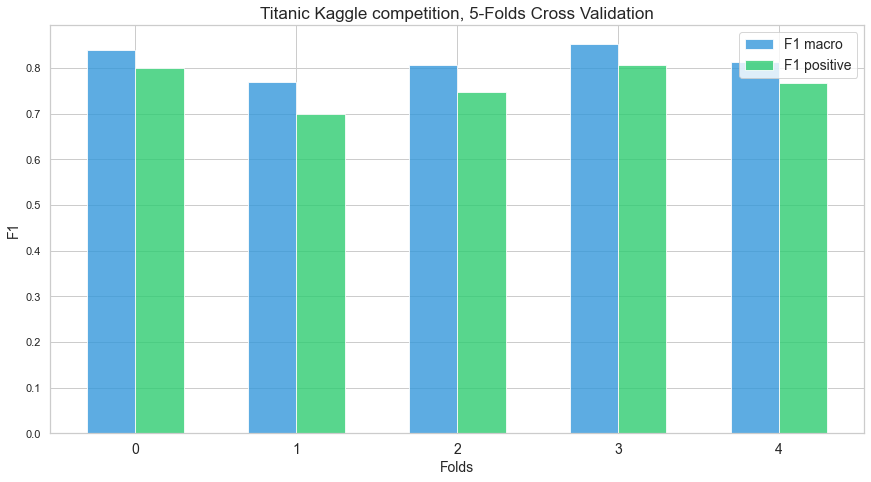

In [48]:
oc.cv_plot(metrics['f1_weighted'],metrics['f1_macro'],metrics['f1_positive'],'Titanic Kaggle competition')

## Scikit learn - Classification report 

In [49]:
print(classification_report(metrics['y'], metrics['predictions_folds']))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       549
           1       0.82      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



## ROC curve with AUC

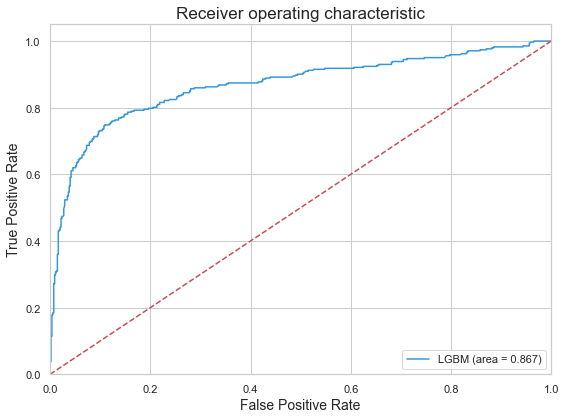

In [50]:
oc.roc_curve_plot(metrics['y'], metrics['predictions_proba'])

## Confusion Matrix plot (normalized and with absolute values) 

<Figure size 432x288 with 0 Axes>

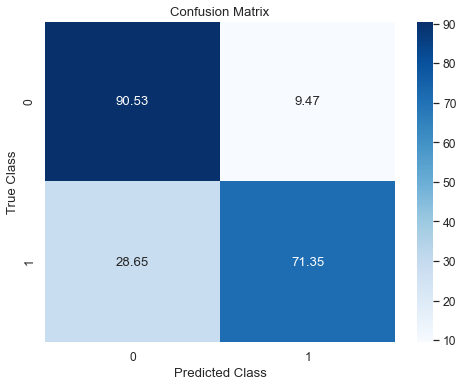

<Figure size 432x288 with 0 Axes>

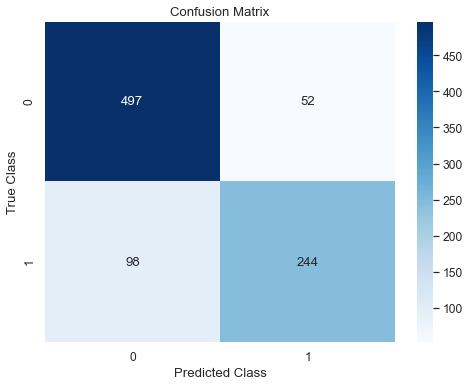

In [51]:
oc.confusion_matrix_plot(metrics['y'], metrics['predictions_folds'])

## Feature Importance plot 

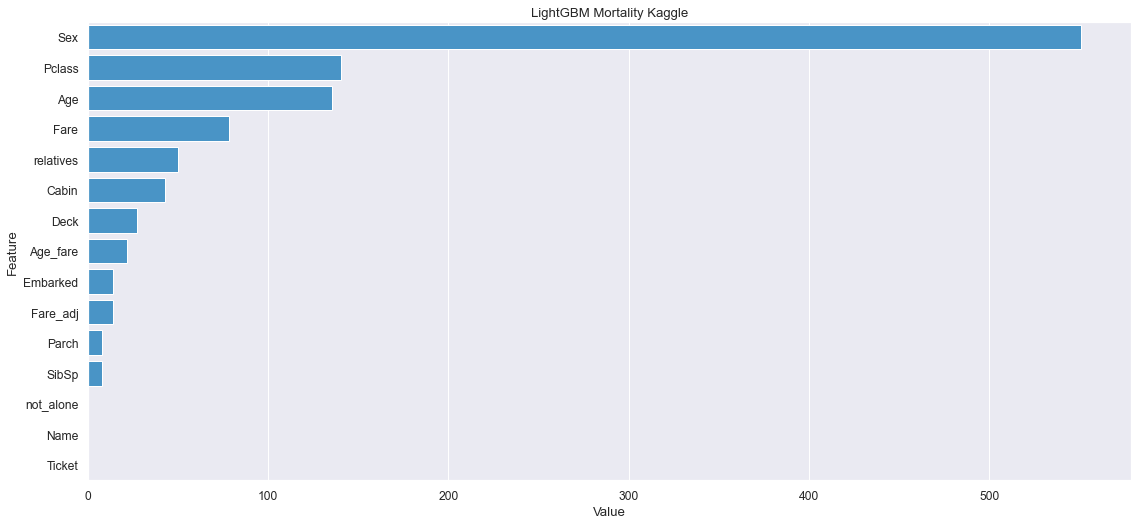

In [52]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'LightGBM Mortality Kaggle',num=15)

In [53]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)

In [54]:
top_features

,Value,Feature
2,550.759131,Sex
0,140.194760,Pclass
3,135.147257,Age
7,78.042008,Fare
11,49.728347,relatives
8,42.700521,Cabin
10,27.265482,Deck
13,21.635730,Age_fare
9,13.955465,Embarked
14,13.915507,Fare_adj


## Correlations analysis (on top features)

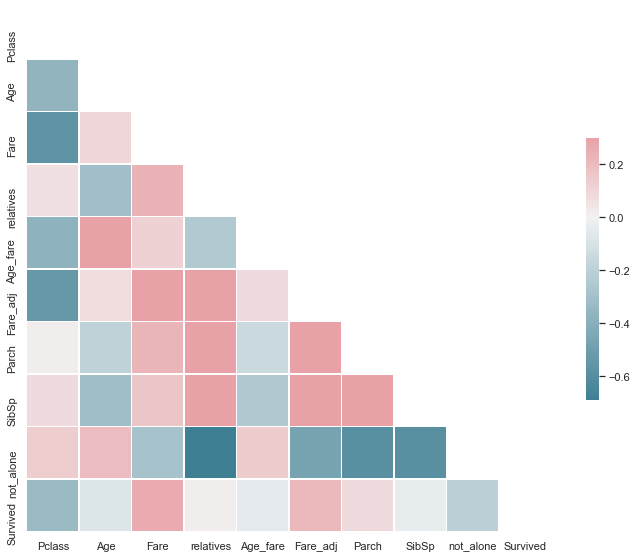

In [55]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('Survived')
oc.correlations(XY_df,list_for_correlations)

## Data leakage test 

In [56]:
oc.data_leakage(X,top_features['Feature'].to_list())

->  Passed the data leakage test - no duplicate intstances detected 
Method Name       : data_leakage
Current memory usage: 0.020817MB
Peak                : 0.190289MB
Total time taken:   9.733 ms 


## Analysis of FPs/FNs

In [57]:
fps=oc.recieve_fps(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)
fns=oc.recieve_fns(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)

calculating using threshold of:  0.5
calculating using threshold of:  0.5


In [58]:
fps

,index,label,preds_proba,preds_class
0,297,0,1.066759,1
1,312,0,0.980033,1
2,177,0,0.937899,1
3,41,0,0.932652,1
4,498,0,0.893928,1
5,357,0,0.876932,1
6,852,0,0.869694,1
7,772,0,0.868053,1
8,854,0,0.838546,1
9,205,0,0.784718,1


In [59]:
fns

,index,label,preds_proba,preds_class
0,338,1,-0.013960,0
1,107,1,-0.007528,0
2,65,1,-0.007385,0
3,709,1,-0.007385,0
4,444,1,-0.006948,0
5,400,1,0.010595,0
6,570,1,0.032801,0
7,127,1,0.037790,0
8,455,1,0.042101,0
9,510,1,0.045326,0


In [60]:
filter_fps  = XY_df[XY_df.index.isin(fps['index'])]
filter_fns  = XY_df[XY_df.index.isin(fns['index'])]
filter_fps_with_prediction=pd.merge(filter_fps,fps[['index','preds_proba']], left_on=[pd.Series(filter_fps.index.values)], right_on=fps['index']) 
filter_fns_with_prediction=pd.merge(filter_fns,fns[['index','preds_proba']], left_on=[pd.Series(filter_fns.index.values)], right_on=fns['index']) 

### Top FPs with full features 

In [61]:
filter_fps_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.0,1,0,11668,21.0000,nan,S,0.0,1,0,1.0,2.0,41,0.932652
1,177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,3.0,0,1,4.0,2.0,177,0.937899
2,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,7.0,1,0,0.0,1.0,205,0.784718
3,297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,0.0,3.0,297,1.066759
4,312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,nan,S,0.0,2,0,1.0,2.0,312,0.980033
5,357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,nan,S,0.0,0,1,2.0,1.0,357,0.876932
6,498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,1.0,3.0,498,0.893928
7,772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,5.0,0,1,4.0,1.0,772,0.868053
8,852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,nan,C,0.0,2,0,0.0,2.0,852,0.869694
9,854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,nan,S,0.0,1,0,2.0,2.0,854,0.838546


### Top FNs with full features 

In [62]:
filter_fns_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,nan,C,0.0,2,0,NaN,2.0,65,-0.007385
1,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,0.0000,nan,S,0.0,0,1,NaN,NaN,107,-0.007528
2,127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,0.0000,nan,S,0.0,0,1,1.0,NaN,127,0.037790
3,338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,nan,S,0.0,0,1,2.0,1.0,338,-0.013960
4,400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,nan,S,0.0,0,1,2.0,1.0,400,0.010595
5,444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,nan,S,0.0,0,1,NaN,1.0,444,-0.006948
6,455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,0.0000,nan,C,0.0,0,1,1.0,NaN,455,0.042101
7,510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,0.0000,nan,Q,0.0,0,1,1.0,NaN,510,0.045326
8,570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,nan,S,0.0,0,1,4.0,1.0,570,0.032801
9,709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,nan,C,0.0,2,0,NaN,2.0,709,-0.007385
